# Midterm Project: Diabetes Detection

## Loading Database

In [1]:
#import pandas
import pandas as pd
#loading csv file
patients = pd.read_csv("diabetes-dataset.csv")

In [2]:
patients.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


##

## Checking for Null Values

In [3]:
#Check how many Null Values in each Column
patients.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Identifying Features and Target Variables

In [4]:
#split dataset into features and target variables
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = patients[feature_cols]  #features
y = patients.Outcome     #target

## Splitting Data into Training and Testing Data

In [5]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Training Logistic Regression Model

In [6]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs', max_iter=2001)

# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=2001)

## Training SVM Model

In [7]:
#import svm model
from sklearn import svm

#create a svm Classifier
clf = svm.SVC(kernel='linear') #Linear Kernel

#Train the model using the trainings sets
clf.fit(X_train, y_train)

SVC(kernel='linear')

## Training Decision Tree Model

In [8]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

## Prediction with Log. Regression, SVM, and Decision Tree

In [9]:
#Predict the response for test datasets
y_pred_svm = clf.predict(X_test)

y_pred_log = logreg.predict(X_test)

y_pred_tree = classifier.predict(X_test)

# compute the accuracy
import numpy as np
accuracy_svm = np.sum(y_pred_svm == y_test) / len(y_test)

accuracy_log = np.sum(y_pred_log == y_test) / len(y_test)

accuracy_tree = np.sum(y_pred_tree == y_test) / len(y_test)

## Training Neural Network

In [10]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scalar.fit(X)
X = scalar.transform(X)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [12]:
X_train.shape

(1600, 8)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(16, input_dim = 8, activation = 'relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(2, activation='relu'))
#model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 7)                 119       
                                                                 
 dense_2 (Dense)             (None, 2)                 16        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 282
Trainable params: 282
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16)

Epoch 1/50
100/100 [==============================] - 0s 465us/step - loss: 0.6603 - accuracy: 0.6494
Epoch 2/50
100/100 [==============================] - 0s 515us/step - loss: 0.6439 - accuracy: 0.6494
Epoch 3/50
100/100 [==============================] - 0s 495us/step - loss: 0.6259 - accuracy: 0.6494
Epoch 4/50
100/100 [==============================] - 0s 495us/step - loss: 0.6055 - accuracy: 0.6494
Epoch 5/50
100/100 [==============================] - 0s 535us/step - loss: 0.5874 - accuracy: 0.6494
Epoch 6/50
100/100 [==============================] - 0s 495us/step - loss: 0.5685 - accuracy: 0.6494
Epoch 7/50
100/100 [==============================] - 0s 475us/step - loss: 0.5565 - accuracy: 0.6494
Epoch 8/50
100/100 [==============================] - 0s 525us/step - loss: 0.5454 - accuracy: 0.6494
Epoch 9/50
100/100 [==============================] - 0s 515us/step - loss: 0.5343 - accuracy: 0.6494
Epoch 10/50
100/100 [==============================] - 0s 495us/step - loss: 0.526

## Prediction with Neural Network

In [43]:
model.predict(X_test)
model.evaluate(X_test, y_test)[1]
model.fit(X_train, y_train)
predictions = model.predict(X_test)
y_pred_neural = (model.predict(X_test) > 0.5).astype(int)

50/50 [==============================] - 0s 878us/step - loss: 0.4196 - accuracy: 0.7969


## Computation of Accuracy and Comparison

In [26]:
print('Test Accuracy of the SVM is:')
print(accuracy_svm)
print('Test Accuracy of the Logistic Model is:')
print(accuracy_log)
print('Test Accuracy of the Decision Tree Model is')
print(accuracy_tree)
print('The difference (SVM - Logistic):')
print(accuracy_svm - accuracy_log)

Test Accuracy of the SVM is:
0.755
Test Accuracy of the Logistic Model is:
0.775
Test Accuracy of the Decision Tree Model is
0.98
The difference (SVM - Logistic):
-0.020000000000000018


# Confusion Matrices

## Logistic Regression

In [19]:
# import the metrics class
from sklearn import metrics
# Confusion Matrix for Logistic Regression
cnf_matrix_log = metrics.confusion_matrix(y_test, y_pred_log)
cnf_matrix_log

array([[198,  79],
       [ 92,  31]], dtype=int64)

## SVM Model

In [20]:
# import the metrics class
from sklearn import metrics
# Confusion Matrix for Logistic Regression
cnf_matrix_svm = metrics.confusion_matrix(y_test, y_pred_svm)
cnf_matrix_svm

array([[200,  77],
       [ 90,  33]], dtype=int64)

## Decision Tree

In [21]:
# import the metrics class
from sklearn import metrics
# Confusion Matrix for Logistic Regression
cnf_matrix_tree = metrics.confusion_matrix(y_test, y_pred_tree)
cnf_matrix_tree

array([[170, 107],
       [ 76,  47]], dtype=int64)

## Neural Network

In [42]:
y_pred_neural.size

2000

In [44]:
# import the metrics class
from sklearn import metrics
# Confusion Matrix for Logistic Regression
cnf_matrix_neural = metrics.confusion_matrix(y_test, y_pred_neural)
cnf_matrix_neural

array([[228,  49],
       [ 33,  90]], dtype=int64)

## Visualizing Confusion Matrix using HeatMap

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

Logistic Regression

Text(0.5, 257.44, 'Predicted label')

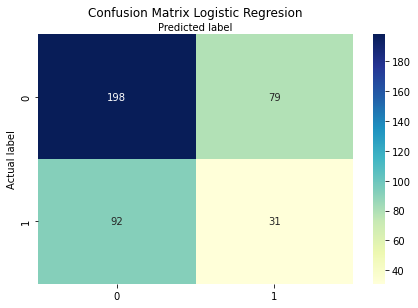

In [47]:
class_names=['0', '1'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(cnf_matrix_log, annot=True, cmap="YlGnBu" ,fmt='d', xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix Logistic Regresion')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Decision Tree

Text(0.5, 257.44, 'Predicted label')

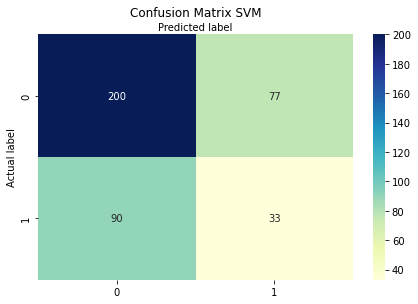

In [48]:
class_names=['0', '1'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(cnf_matrix_svm, annot=True, cmap="YlGnBu" ,fmt='d', xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix SVM')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Decision Tree

Text(0.5, 257.44, 'Predicted label')

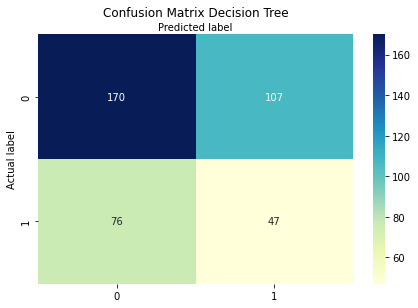

In [49]:
class_names=['0', '1'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(cnf_matrix_tree, annot=True, cmap="YlGnBu" ,fmt='d', xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix Decision Tree')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Neural Network

Text(0.5, 257.44, 'Predicted label')

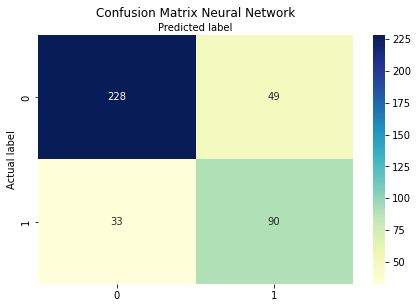

In [50]:
class_names=['0', '1'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(cnf_matrix_neural, annot=True, cmap="YlGnBu" ,fmt='d', xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix Neural Network')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')